In [1]:
library(limma)
devtools::load_all("/stornext/General/data/academic/lab_davis/prot/benchmarking/msImpute/")

ℹ Loading msImpute



In [2]:
fig.size <- function (height, width) {
    options(repr.plot.height = height, repr.plot.width = width, repr.plot.res = 200)
}


### Read data


In [3]:
dda_skyline <- read.csv('~/softImpute_low_rank_experimentation/data/ControlMixture_DDA_Skyline_input.csv')
dda_pd <- read.csv('~/softImpute_low_rank_experimentation/data/ControlMixture_DDA_ProteomeDiscoverer_input.csv') # no modifications
dda_progenesis <- read.csv('~/softImpute_low_rank_experimentation/data/ControlMixture_DDA_Progenesis_input.csv')



# make precursor ids
dda_skyline$PeptideID <- paste(dda_skyline$Peptide.Modified.Sequence, dda_skyline$Precursor.Charge,
                               dda_skyline$Protein.Name, sep = "_")


dda_pd$PeptideID <- paste(dda_pd$Sequence, dda_pd$Charge, dda_pd$Protein.Group.Accessions,
                          sep="_")




i <- grep('Raw', colnames(dda_progenesis))
j <- grep('Spectral', colnames(dda_progenesis))

X_progenesis <- dda_progenesis[-c(1:2),i:(j-1)]
colnames(X_progenesis) <- as.character(dda_progenesis[2,i:(j-1)])

colnames(dda_progenesis) <- dda_progenesis[2,]
dda_progenesis <-dda_progenesis[-c(1:2),]
  

X_progenesis$PeptideID <- paste(dda_progenesis$Sequence, dda_progenesis$Charge, dda_progenesis$Accession,
                                sep = '_')



data <- read.delim("~/softImpute_low_rank_experimentation/data/ControlMixture_DDA_MaxQuant_evidence.txt", stringsAsFactors = FALSE)
data$PeptideID <- paste0(data$Modified.sequence, data$Charge)
data$PeptideID <- paste(data$PeptideID, data$Leading.Razor.Protein, sep ="_")
data$PeptideID <- gsub('^_','', data$PeptideID)

length(intersect(data$PeptideID, X_progenesis$PeptideID))
length(intersect(data$PeptideID, dda_pd$PeptideID))
length(intersect(data$PeptideID, dda_skyline$PeptideID))

[1] 16238

[1] 16175

[1] 8757

### Annotation

In [4]:

targets <- read.csv('~/softImpute_low_rank_experimentation/data/ControlMixture_DDA_ProteomeDiscoverer_annotation.csv')

In [5]:
subset1 <- c("P02701",
"P00711",
"Q29443",
"Q29550",
"P0CG53",
"P68082",
"P00432",
"P02754",
"P24627",
"P80025")

subset2 <- c("P00915",
"P02787",
"P02663",
"P01008",
"P00921",
"P05307",
"P61769",
"PO5067",
"P01012",
"P02666")

subset3 <- c("Q3SX14",
"P00563",
"P02769",
"Q58D62",
"P00698",
"P00004",
"P00711",
"P00442",
"P01133",
"P02753")


## see here for the table of expected DE
## https://pubs.acs.org/doi/10.1021/pr500294d

### Prepocessing (getting data in matrix shape)

In [6]:

peptide_id = 'PeptideID'

### skyline -------
y_skyline <- aggregate(dda_skyline[,"Area"] ~ dda_skyline[, "File.Name"] + dda_skyline[, peptide_id],
                 FUN = function(x) max(x, na.rm=TRUE),
                 na.action = na.pass)


y_skyline <- tidyr::spread(y_skyline, key = 1, value = 3)
rownames(y_skyline) <- y_skyline[,1]
y_skyline[,1] <- NULL
y_skyline[y_skyline == 0] <- NA

y_skyline <- log2(data.matrix(y_skyline))

### Proteome discoverer ----
y_pd <- aggregate(dda_pd[,"Precursor.Area"] ~ dda_pd[, "Spectrum.File"] + dda_pd[, peptide_id],
                 FUN = function(x) max(x, na.rm=TRUE),
                 na.action = na.pass)


y_pd <- tidyr::spread(y_pd, key = 1, value = 3)
rownames(y_pd) <- y_pd[,1]
y_pd[,1] <- NULL
table(y_pd == 0)
table(y_pd == -Inf)
y_pd[y_pd == -Inf] <- NA

y_pd <- log2(data.matrix(y_pd))


## Progenesis ----
y_progen <- aggregate(. ~ PeptideID,
                 FUN = function(x) max(x, na.rm=TRUE),
                 na.action = na.pass, data = X_progenesis)
rownames(y_progen) <- y_progen$PeptideID
y_progen[,1] <- NULL
y_progen[y_progen == 0] <- NA

y_progen <- log2(data.matrix(y_progen))

### MaxQuant

y_mq <- evidenceToMatrix(data)
y_mq <- log2(y_mq)


y_skyline[y_skyline == 0] <- NA




Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


 FALSE 
201128 


 FALSE   TRUE 
196517   4611 

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

### Check type of missing values in the data (for all quant tools)


In [7]:
group <- targets$Condition


hdp <- selectFeatures(y_progen,
                      method="ebm", group = group)


#hdp
table(hdp$msImpute_feature) # msImpute features are peptides that exhibit condition-specific missing values

ebms <- hdp$EBM
ebms[hdp$msImpute_feature] <- -1
# hist(ebms)
# plot(hdp$AveExpr, ebms, pch = 16, cex = 0.3)


library(ggplot2)
library(ggsci)

ggdat <- data.frame(hdp)
ggdat$metric <- ebms
ggdat$type <- ifelse(ggdat$metric == -1, "group-specific","random")
ggdat$type <- factor(ggdat$type, levels= c("random","group-specific"))



p1 <- ggplot(ggdat, aes(x=AveExpr, fill = type)) +
  geom_density(alpha = 0.8) + scale_fill_d3() +
  theme_bw() + labs(title = "DDA:ControlledMix \n Chiva et al. 2014 \nProgenesis")  +
  theme(axis.text.y = element_text(hjust = 1, size=14, color = "black"),
      axis.text.x = element_text(hjust=1, size = 14, color= "black"),
                strip.text.x = element_text(size=14),
                plot.title = element_text(hjust = 0.5, size = 14),
      axis.title=element_text(size=14),
      panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 3, linetype = "solid"),
  panel.grid.major = element_line(#size = 3,
                                  linetype = 'longdash',
                                colour = "grey90"), 
  panel.grid.minor = element_line(#size = 3, 
                                  linetype = 'longdash',
                                colour = "grey90"),
      axis.line = element_line(colour = "black"),
      axis.ticks = element_line(colour = "black"),
      legend.text=element_text(size=12)
                #legend.position = "none"
     ) 


FALSE  TRUE 
20587    91 

In [8]:
hdp <- selectFeatures(y_pd[rowSums(!is.na(y_pd))  >= 4,],
                      method="ebm", group = group)


#hdp
table(hdp$msImpute_feature) # msImpute features are peptides that exhibit condition-specific missing values

ebms <- hdp$EBM
ebms[hdp$msImpute_feature] <- -1
# hist(ebms)
# plot(hdp$AveExpr, ebms, pch = 16, cex = 0.3)




ggdat <- data.frame(hdp)
ggdat$metric <- ebms
ggdat$type <- ifelse(ggdat$metric == -1, "group-specific","random")
ggdat$type <- factor(ggdat$type, levels= c("random","group-specific"))



p2 <- ggplot(ggdat, aes(x=AveExpr, fill = type)) +
  geom_density(alpha = 0.8) + scale_fill_d3() +
  theme_bw() + labs(title = "DDA:ControlledMix \n Chiva et al. 2014 \nProteome Discoverer")  +
  theme(axis.text.y = element_text(hjust = 1, size=14, color = "black"),
      axis.text.x = element_text(hjust=1, size = 14, color= "black"),
                strip.text.x = element_text(size=14),
                plot.title = element_text(hjust = 0.5, size = 14),
      axis.title=element_text(size=14),
      panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 3, linetype = "solid"),
  panel.grid.major = element_line(#size = 3,
                                  linetype = 'longdash',
                                colour = "grey90"), 
  panel.grid.minor = element_line(#size = 3, 
                                  linetype = 'longdash',
                                colour = "grey90"),
      axis.line = element_line(colour = "black"),
      axis.ticks = element_line(colour = "black"),
      legend.text=element_text(size=12)
                #legend.position = "none"
     ) 


FALSE  TRUE 
12444  3653 

In [9]:
hdp <- selectFeatures(y_mq[rowSums(!is.na(y_mq)) >=4,],
                      method="ebm", group = group)


#hdp
table(hdp$msImpute_feature) # msImpute features are peptides that exhibit condition-specific missing values

ebms <- hdp$EBM
ebms[hdp$msImpute_feature] <- -1
# hist(ebms)
# plot(hdp$AveExpr, ebms, pch = 16, cex = 0.3)



ggdat <- data.frame(hdp)
ggdat$metric <- ebms
ggdat$type <- ifelse(ggdat$metric == -1, "group-specific","random")
ggdat$type <- factor(ggdat$type, levels= c("random","group-specific"))



p3 <- ggplot(ggdat, aes(x=AveExpr, fill = type)) +
  geom_density(alpha = 0.8) + scale_fill_d3() +
  theme_bw() + labs(title = "DDA:ControlledMix \n Chiva et al. 2014 \nMaxQuant")  +
  theme(axis.text.y = element_text(hjust = 1, size=14, color = "black"),
      axis.text.x = element_text(hjust=1, size = 14, color= "black"),
                strip.text.x = element_text(size=14),
                plot.title = element_text(hjust = 0.5, size = 14),
      axis.title=element_text(size=14),
      panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 3, linetype = "solid"),
  panel.grid.major = element_line(#size = 3,
                                  linetype = 'longdash',
                                colour = "grey90"), 
  panel.grid.minor = element_line(#size = 3, 
                                  linetype = 'longdash',
                                colour = "grey90"),
      axis.line = element_line(colour = "black"),
      axis.ticks = element_line(colour = "black"),
      legend.text=element_text(size=12)
                #legend.position = "none"
     ) 


FALSE  TRUE 
21652  2309 

In [10]:
hdp <- selectFeatures(y_skyline,
                      method="ebm", group = group)


# No NaN EBMs detected. Peptides are missing evenly across samples.

No NaN EBMs detected. Peptides are missing evenly across samples.

Switchted to 'hvp' method as final msImpute features



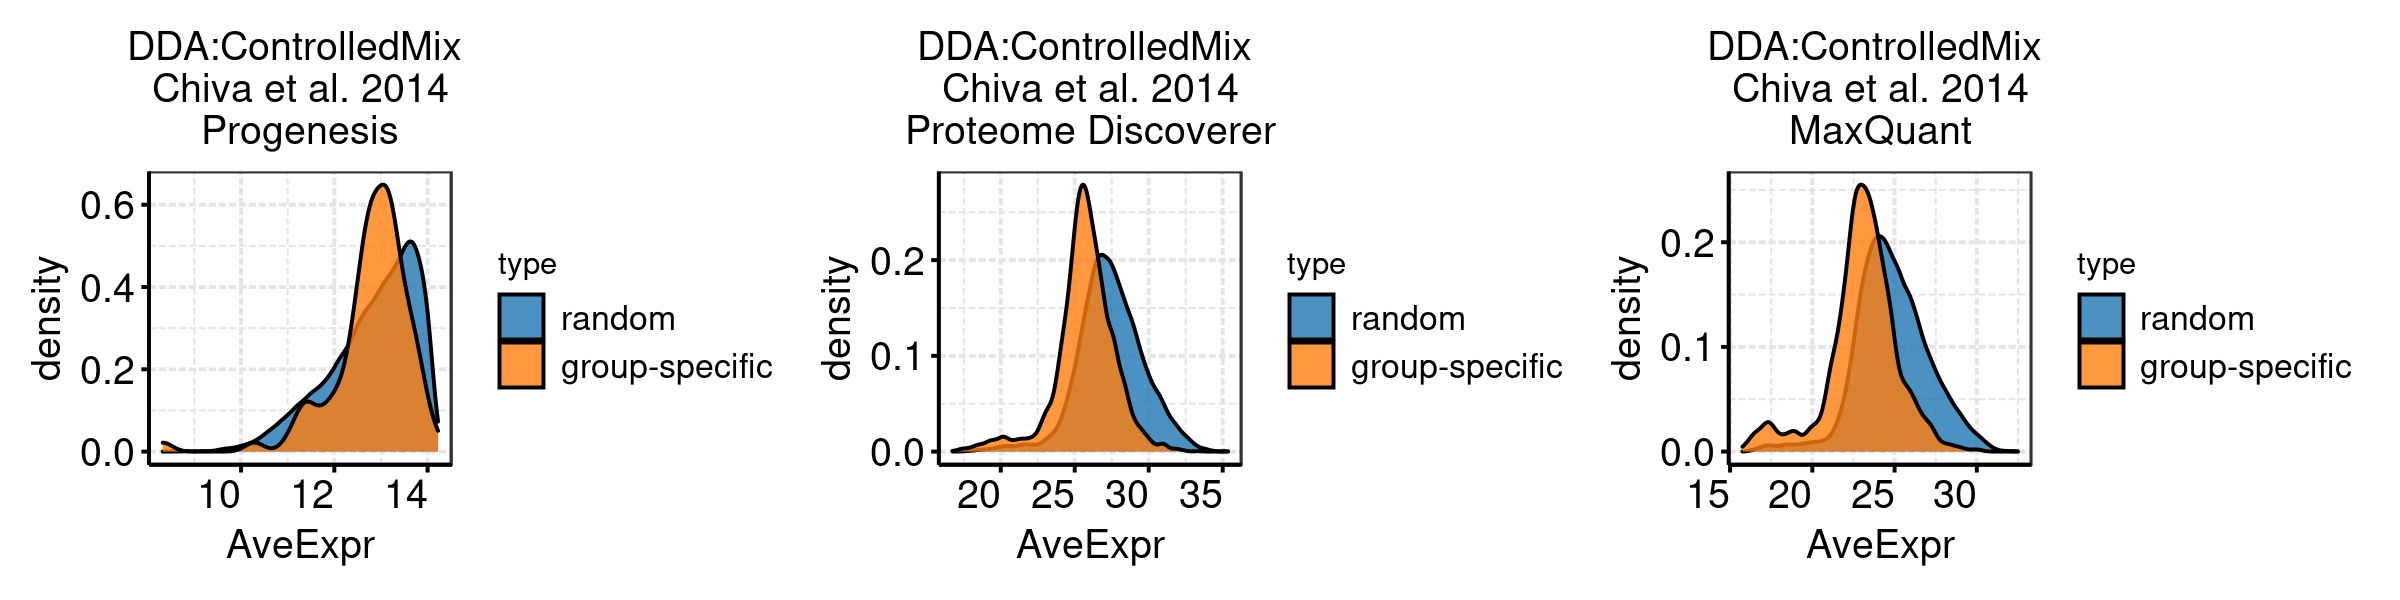

In [11]:
fig.size(3, 12)
library(patchwork)
p1 + p2 + p3

### Imputation, normalisation, differential expression

In [12]:
# mixture 2 and 3, second protein subset has to have 5 fold difference

y_pd <- y_pd[rowSums(!is.na(y_pd)) >= 4, ]
y_progen<- y_progen[rowSums(!is.na(y_progen)) >= 4, ]
y_mq <- y_mq[rowSums(!is.na(y_mq)) >= 4, ]

In [13]:
group <- factor(group)
design <- model.matrix(~ 0 + group)
con_mat <- makeContrasts(groupCondition2 - groupCondition3, levels = design)


target_prots <- Reduce(union, list(subset1, subset2, subset3))
keep_peptide <- function(x, prots){
  rownames(x)[gsub("(.*)_(.*)_(.*)","\\3", rownames(x)) %in% prots]
}


target_hits <- Reduce(intersect, list(
  keep_peptide(y_mq, target_prots),
  keep_peptide(y_progen, target_prots),
  keep_peptide(y_pd, target_prots),
  keep_peptide(y_skyline, target_prots)
  )
  )

length(target_hits)

table(complete.cases(y_skyline[as.character(target_hits),]))
table(complete.cases(y_pd[as.character(target_hits),]))
table(complete.cases(y_progen[as.character(target_hits),]))
table(complete.cases(y_mq[as.character(target_hits),]))



# hdp_pd <- selectFeatures(y_pd,
#                       method="ebm", group = group)
# tech_features <- setdiff(hdp_pd$name[hdp_pd$msImpute_feature], target_hits)
# y_pd <-  y_pd[!rownames(y_pd) %in% tech_features,] # drop technical group-specific dropouts

common_features <-Reduce(intersect, list(
  rownames(y_mq),
  rownames(y_progen),
  rownames(y_pd),
  rownames(y_skyline)
  )
  )

length(common_features)




mats = list('skyline' = y_skyline, 'proteome_discoverer' = y_pd, 
            'progenesis' = y_progen, 'maxquant' = y_mq)


table(target_hits %in% common_features)

[1] 186


FALSE  TRUE 
    4   182 


FALSE  TRUE 
   93    93 


FALSE  TRUE 
    1   185 


FALSE  TRUE 
   28   158 

[1] 5836


TRUE 
 186 

In [14]:
n_ups <- 500
fdr_thresh <- 0.05



tplist <- list()

topN <- list()
fullTables <- list()
fullTables2 <- list()
for(i in seq_along(mats)){
  message("processing ", names(mats)[i])
  if(names(mats)[i] == 'skyline'){
    y <- msImpute(mats[[i]], 
                       # a = 0.8,
                       rank.max = 2,
                       method = "v2", 
                       group = group
                # gauss_shift = 4.8
                )
  }else{
    y <- msImpute(mats[[i]], 
                       # a = 0.95,
                       # rank.max = 2,
                       method = "v2-mnar", 
                       group = group,
                # gauss_shift = 10,
                # gauss_width = 1.5,
                )
  }
  
  
  
  
  E <- normalizeBetweenArrays(y[common_features,], method = "cyclicloess")
  keep <- !complete.cases(mats[[i]][common_features,])
  print(table(keep))
  fit <- lmFit(E, design = design)
  fit <- contrasts.fit(fit, contrasts = con_mat)
  fit <- eBayes(fit)
  print(summary(decideTests(fit)))

  tp <- topTable(fit, coef=ncol(fit), number = Inf, p.value = 1)
 
  
  tp$de <- ifelse(tp$adj.P.Val < fdr_thresh, 1,0)
  # tp$de <- ifelse(tp$P.Value < fdr_thresh, 1,0) # to drop dependency of FDR correction on total number of features
  tp$isUPS <- ifelse(rownames(tp) %in% target_hits,1,0)
  # tp$isdeUPS <- ifelse(tp$isUPS==1 & tp$de==1,1,0)
  tp$TP <- ifelse(tp$de==1 & tp$isUPS==1,1,0) # a ups called DE is a true positive
  tp$FN <- ifelse(tp$de==0 & tp$isUPS==1,1,0) # a ups called not DE is a false negative
  tp$FN_unestim <- ifelse(is.na(tp$adj.P.Val) & tp$isUPS==1,1,0)
  tp$fd <- ifelse(tp$isUPS==0 & tp$de ==1 ,1,0) # & !complete.cases(y_dda[match(rownames(tp), rownames(y_dda)),])
  tp$FDR <- cumsum(tp$fd)/cumsum(tp$de)
  topN[[names(mats)[i]]] <- data.frame(N=seq_len(n_ups),
                                       numUPS=cumsum(tp$isUPS)[seq_len(n_ups)],
                                       #numUPS=cumsum(tp$TP)[seq_len(n_ups)],
                                       FDR=tp$FDR[seq_len(n_ups)],
                                       nominalFDR= ifelse(seq_len(n_ups) == which(tp$adj.P.Val > fdr_thresh)[1],1,0),
                                       method=names(mats)[i])
  
  
  #tp <- tp[order(tp$P.Value, decreasing = TRUE),]

  tplist[[names(mats[i])]] <- tp
  
  
  fullTables[[names(mats)[i]]] <- data.frame(
    
    # TP = cumsum(tp$TP),
    # FN = cumsum(tp$FN),
    # FDR = tp$FDR,
    # FP = cumsum(tp$fd),
    # nominalFDR_5percent = ifelse(seq_len(nrow(tp)) == which(tp$adj.P.Val > 0.05)[1], 1, 0),
    # nominalFDR_10percent = ifelse(seq_len(nrow(tp)) == which(tp$adj.P.Val > 0.1)[1], 1, 0),
    # method=names(mats)[i]
    
    # replace with labels and predictions to use pROC
    predictions = -log10(tp$P.Value),
    labels = tp$isUPS,
    isImputed = !complete.cases(mats[[i]][common_features,])
    
    
    
    )
  
  fullTables2[[names(mats)[i]]] <- data.frame(
    
    # TP = cumsum(tp$isUPS)/cumsum(tp$de),
    # FP = (cumsum(1-tp$isUPS)/cumsum(tp$de))
    
    # TP = cumsum(tp$isUPS),
    # FP = cumsum(1-tp$isUPS)
    
    TP = cumsum(tp$TP),
    FP = cumsum(tp$fd),
    TP_total_imputed = sum(tp$TP[!complete.cases(mats[[i]][common_features,])], na.rm = TRUE),
    TP_total_observed = sum(tp$TP[complete.cases(mats[[i]][common_features,])], na.rm = TRUE),
    FP_total_imputed = sum(tp$fd[!complete.cases(mats[[i]][common_features,])], na.rm = TRUE),
    FP_total_observed = sum(tp$fd[complete.cases(mats[[i]][common_features,])], na.rm = TRUE),
    FN_total_imputed = sum(tp$FN[!complete.cases(mats[[i]][common_features,])], na.rm = TRUE),
    FN_total_observed = sum(tp$FN[complete.cases(mats[[i]][common_features,])], na.rm = TRUE),
    FN_unestim_total_imputed = sum(tp$FN_unestim[!complete.cases(mats[[i]][common_features,])], na.rm = TRUE),
    FN_unestim_total_observed = sum(tp$FN_unestim[complete.cases(mats[[i]][common_features,])], na.rm = TRUE)
    
    

    
    )
}


topN <- do.call(rbind, topN)
fullTables <- do.call(rbind, fullTables)
fullTables$method <- gsub("(.*)\\.(.*)","\\1", rownames(fullTables))
fullTables$predictions[is.na(fullTables$predictions)] <- 0


fullTables2 <- do.call(rbind, fullTables2)
fullTables2$method <- gsub("(.*)\\.(.*)","\\1", rownames(fullTables2))

processing skyline

Running msImpute version 2

Estimate distribution under MAR assumption

rank is 2

computing lambda0 ...

lambda0 is 3.19520687077903

fit the low-rank model ...

model fitted. 
Imputting missing entries ...

Imputation completed



keep
FALSE  TRUE 
 5708   128 
       groupCondition2 - groupCondition3
Down                                  28
NotSig                              5783
Up                                    25


processing proteome_discoverer

Running msImpute version 2

Estimate distribution under MAR assumption

rank is 9

computing lambda0 ...

lambda0 is 60.315491977034

fit the low-rank model ...

model fitted. 
Imputting missing entries ...

Imputation completed

Compute barycenter of MAR and NMAR distributions v2-mnar



keep
FALSE  TRUE 
 2521  3315 
       groupCondition2 - groupCondition3
Down                                 138
NotSig                              5628
Up                                    70


processing progenesis

Running msImpute version 2

Estimate distribution under MAR assumption

rank is 4

computing lambda0 ...

lambda0 is 7.13992190761496

fit the low-rank model ...

model fitted. 
Imputting missing entries ...

Imputation completed

Compute barycenter of MAR and NMAR distributions v2-mnar



keep
FALSE  TRUE 
 5760    76 
       groupCondition2 - groupCondition3
Down                                  52
NotSig                              5724
Up                                    60


processing maxquant

Running msImpute version 2

Estimate distribution under MAR assumption

rank is 7

computing lambda0 ...

lambda0 is 25.7997885302553

fit the low-rank model ...

model fitted. 
Imputting missing entries ...

Imputation completed

Compute barycenter of MAR and NMAR distributions v2-mnar



keep
FALSE  TRUE 
 4664  1172 
       groupCondition2 - groupCondition3
Down                                  91
NotSig                              5673
Up                                    72


In [15]:
tp_pd <- tplist[['proteome_discoverer']]
tp_mq <- tplist[['maxquant']]


In [16]:
hdp_pd <- selectFeatures(y_pd,
                      method="ebm", group = group)

table(hdp$msImpute_feature)
length(intersect(hdp$name[hdp$msImpute_feature], target_hits))


FALSE  TRUE 
10020   500 

[1] 4

In [17]:
y_imp_pd <- msImpute(y_pd, 
                       # a = 0.05,
                       # rank.max = 2,
                       method = "v2-mnar", 
                       group = group,
                gauss_shift = 15
                # gauss_width = 1.2,
                )



Running msImpute version 2

Estimate distribution under MAR assumption

rank is 9

computing lambda0 ...

lambda0 is 60.315491977034

fit the low-rank model ...

model fitted. 
Imputting missing entries ...

Imputation completed

Compute barycenter of MAR and NMAR distributions v2-mnar



#### barplots

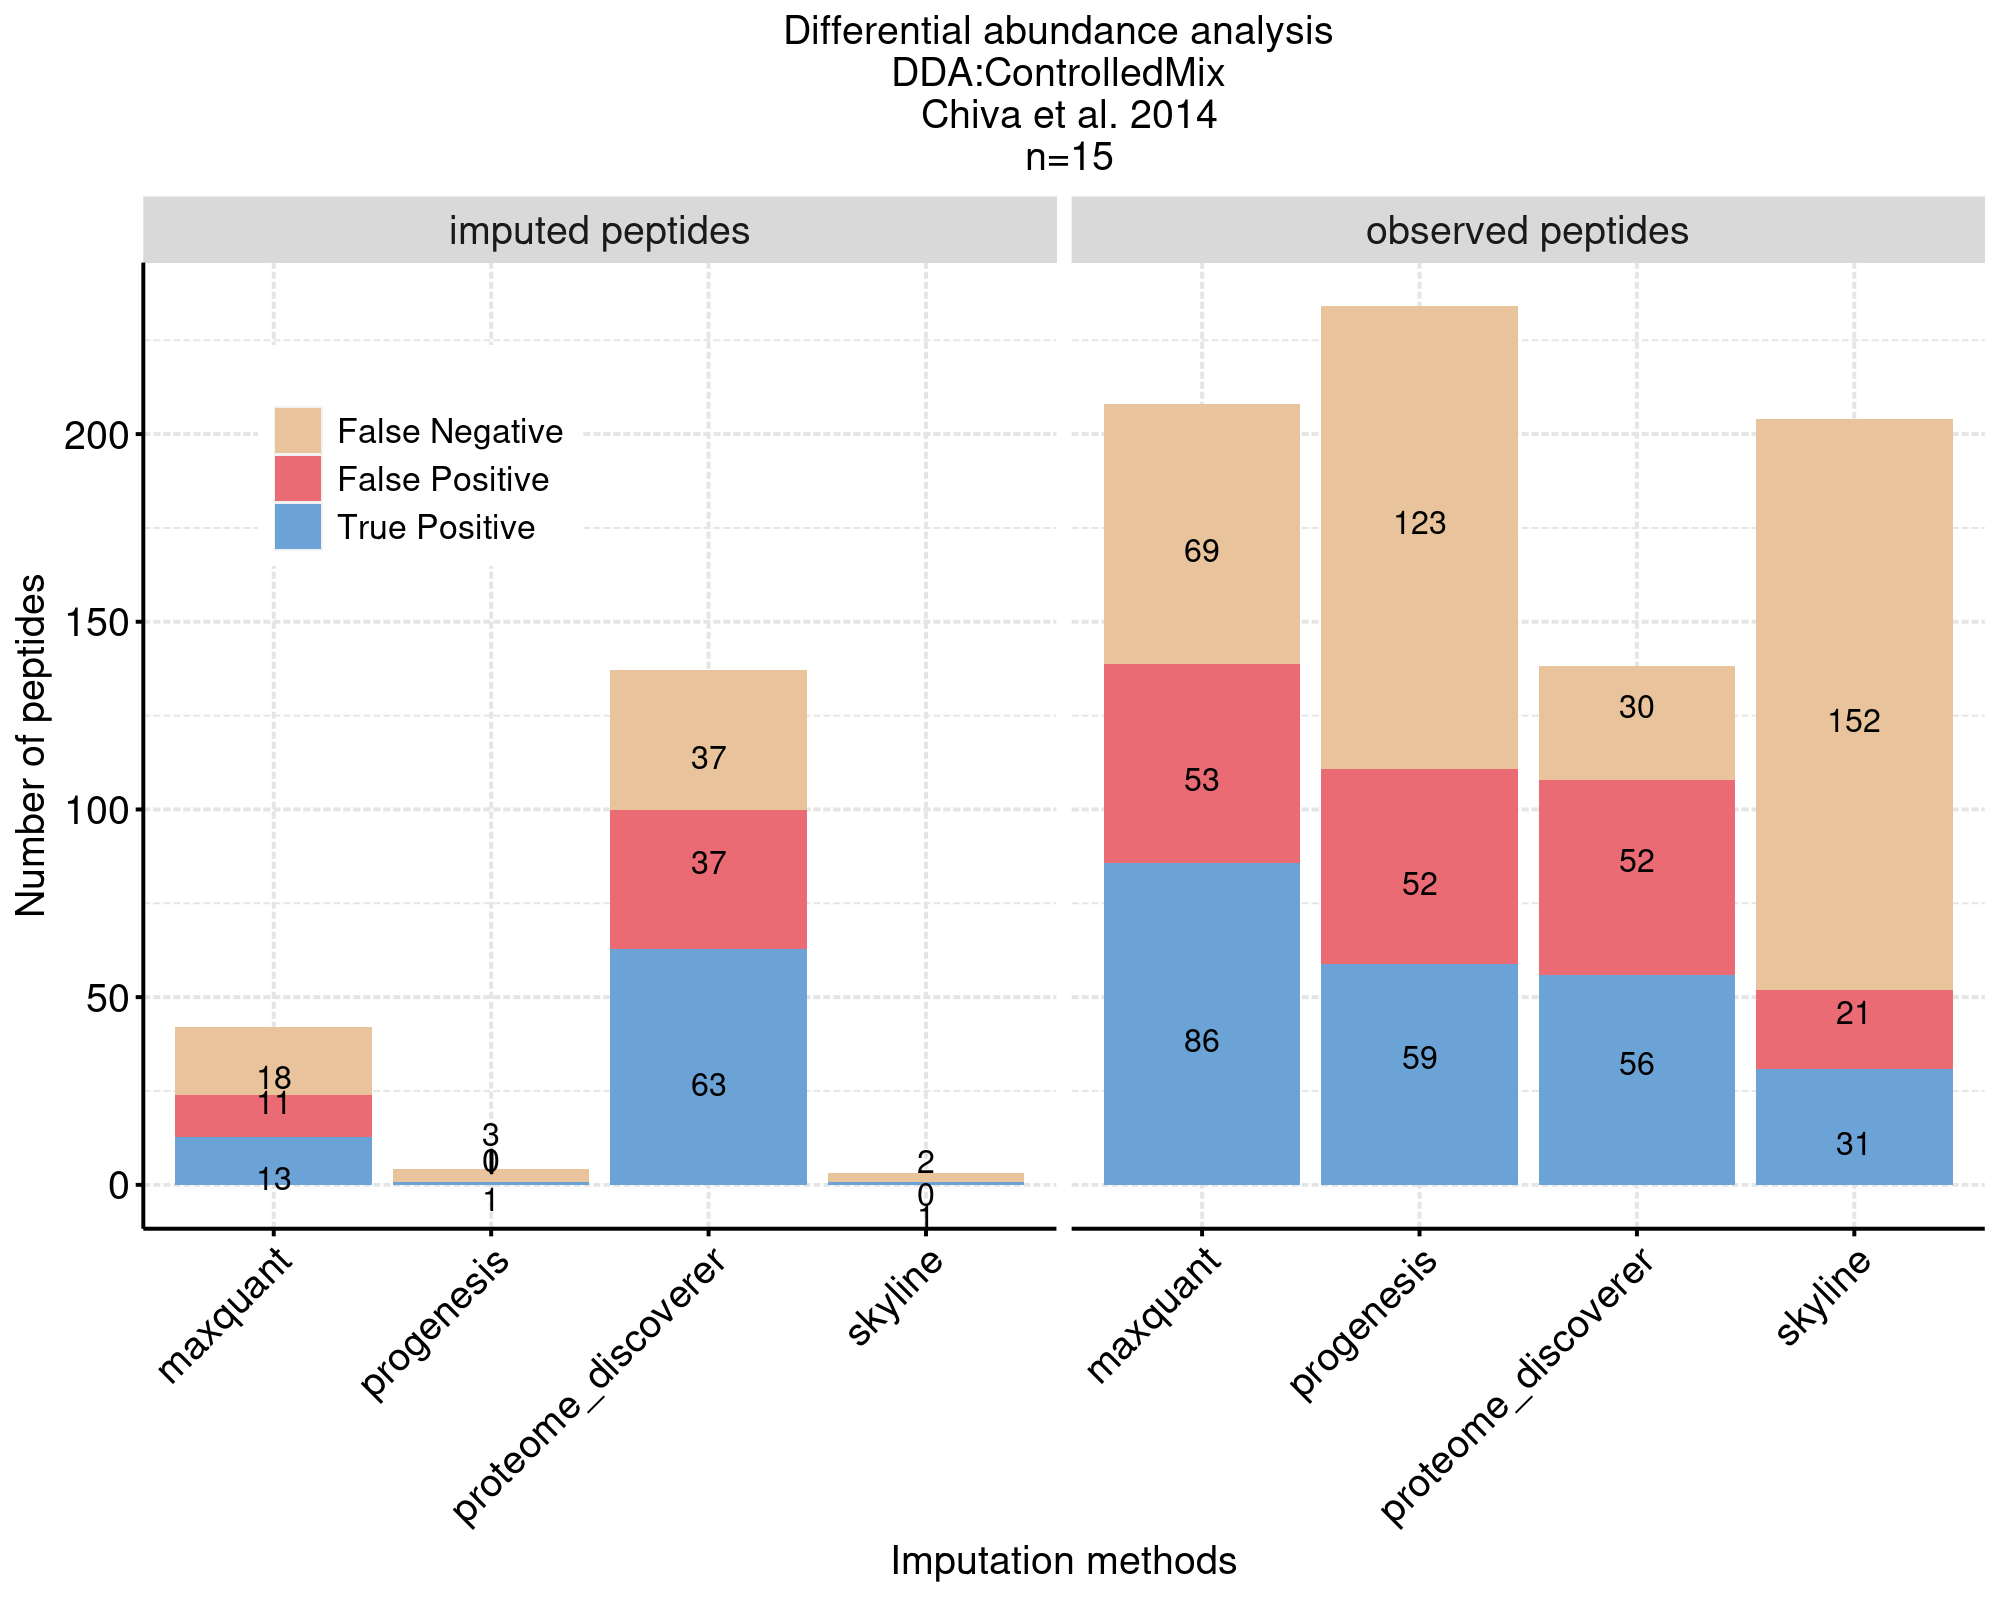

In [18]:
fig.size(8, 10)

# Barplot of True positive, false positives and false negatives for all methods at FDR 0.05
ggdat <- fullTables2[,grep("method|total", colnames(fullTables2))]
ggdat <- ggdat[!duplicated(ggdat$method),]
colnames(ggdat) <- gsub("_total", "", colnames(ggdat))


ggdat <- reshape2::melt(ggdat, id = "method")
ggdat$method <- factor(ggdat$method)
ggdat$TYPE <- factor(gsub("(.*)_(.*)", "\\2 peptides" ,ggdat$variable))

ggdat$variable <- gsub('_imputed','', ggdat$variable)
ggdat$variable <- gsub('_observed','', ggdat$variable)
ggdat$variable <- gsub("TP", "True Positive", ggdat$variable)
ggdat$variable <- gsub('FN_unestim', 'False Negative(unestimable)', ggdat$variable)
ggdat$variable <- gsub("FP", "False Positive", ggdat$variable)
ggdat$variable <- gsub("FN", "False Negative", ggdat$variable)


#drop unstim ----

ggdat <- ggdat[!ggdat$variable %in% "False Negative(unestimable)",]



library(ggthemes)

dataset_name = 'PXD005642'

# png(file = paste0("revision_figures/barplot_",dataset_name, "_FDR", fdr_thresh, ".png"),
#     width=5.5,height=6.55, units="in",res=300)

p <- ggplot(ggdat, aes(x=method, y = value, fill = variable, label=value)) +
  geom_bar(stat = "identity", position="stack") +
 
  ggrepel::geom_text_repel(size = 4, 
            position = position_stack(vjust = 0.5), direction = "y", 
            box.padding = unit(0.01, "lines")) + 
  xlab('Imputation methods') + ylab('Number of peptides') + 
    

  scale_fill_manual(values = c(
                               'False Negative' = "#e9c39b" ,
                               'True Positive' = "#6ba3d6", 
                               'False Positive' = "#ea6b73")) + 
  labs(fill="", title = "Differential abundance analysis \nDDA:ControlledMix \n Chiva et al. 2014\n n=15") +
  #scale_fill_brewer(palette = "Dark2", direction = -1) +
  theme(axis.text.y = element_text(hjust = 1, size=14, color = "black"),
      axis.text.x = element_text(angle = 45, vjust = 1, hjust=1, size = 14, color= "black"),
                strip.text.x = element_text(size=14),
                plot.title = element_text(hjust = 0.5, size = 14),
      axis.title=element_text(size=14),
      panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 3, linetype = "solid"),
  panel.grid.major = element_line(#size = 3,
                                  linetype = 'longdash',
                                colour = "grey90"), 
  panel.grid.minor = element_line(#size = 3, 
                                  linetype = 'longdash',
                                colour = "grey90"),
      axis.line = element_line(colour = "black"),
      axis.ticks = element_line(colour = "black"),
      legend.text=element_text(size=12),
                legend.position = c(0.15,0.8)
     ) + facet_wrap(.~TYPE)

# print(p)
# dev.off()
p


FALSE  TRUE 
18653  4691 

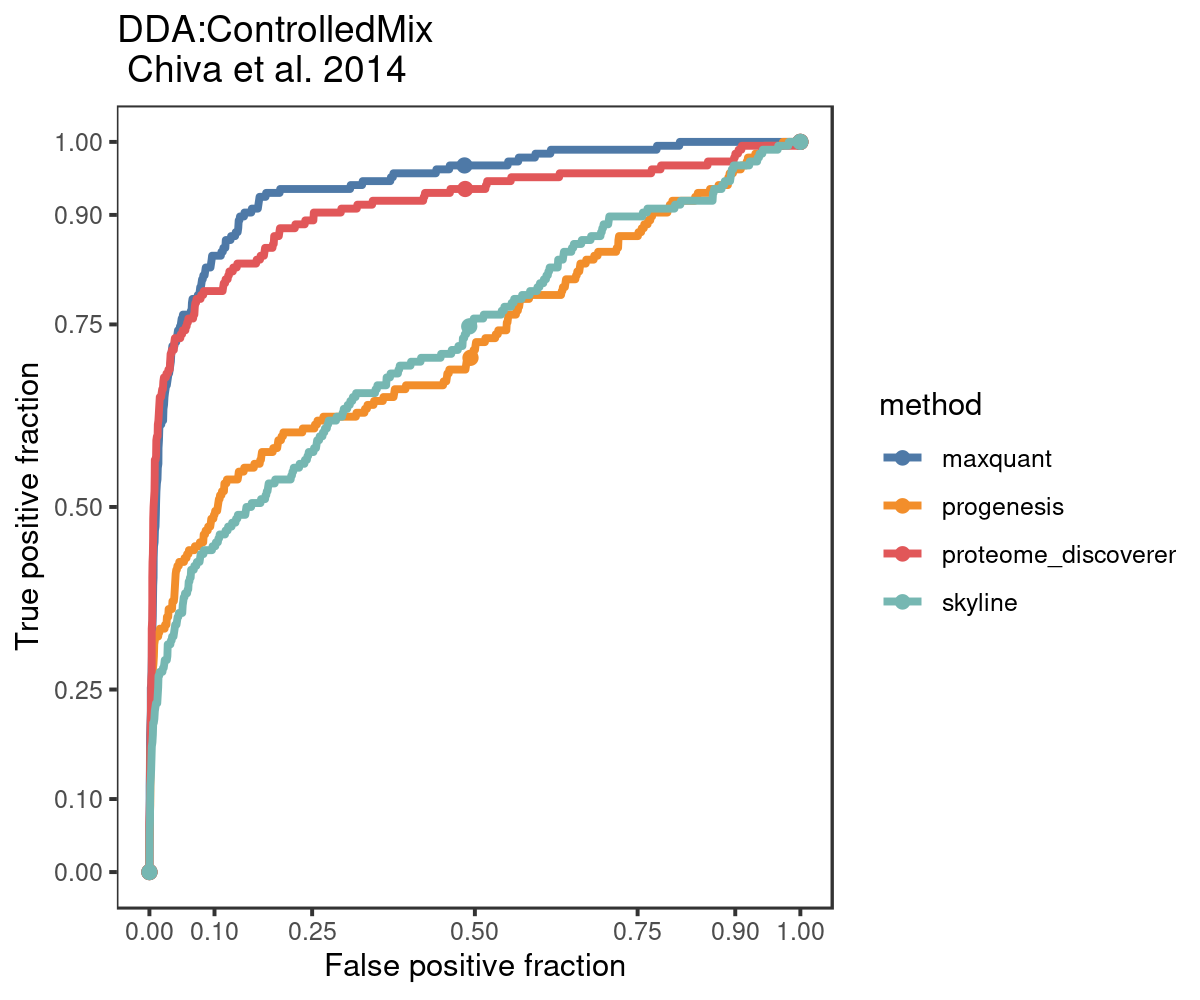

In [19]:
fig.size(5, 6)

library(plotROC)
library(ggthemes)


ggdatf <- fullTables


table(fullTables$isImputed)

# png(file = paste0("revision_figures/ROC_",dataset_name, "_FDR", fdr_thresh, ".png"),
#     width=5,height=5, units="in",res=300)
proc <- ggplot(data = ggdatf, aes(m = predictions, d = labels, group = method, color = method))+ geom_roc(n.cuts=3,labels=FALSE) +
   style_roc(guide = FALSE) + 
  scale_color_tableau() +
  labs(title = "DDA:ControlledMix \n Chiva et al. 2014") + 
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())


# print(proc)
# dev.off()
proc


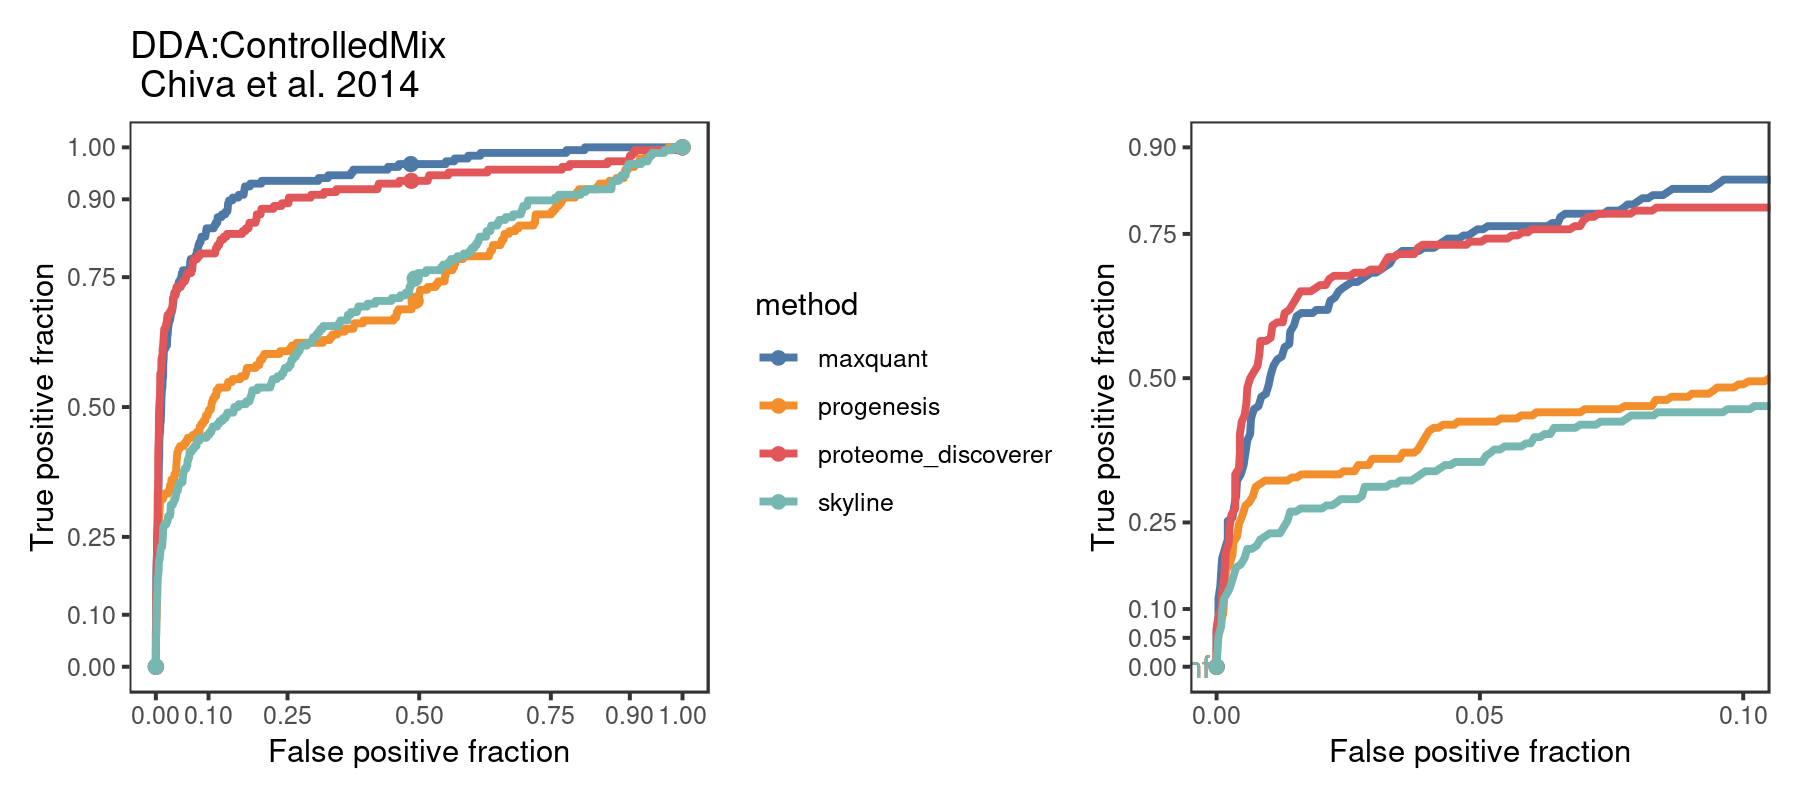

In [20]:
fig.size(4,9)
proc_zoom <- ggplot(data = ggdatf, aes(m = predictions, d = labels, group = method, color = method))+ geom_roc(n.cuts=3,labels=TRUE) +
   style_roc(guide = FALSE, major.breaks = c(0, 0.05 ,0.1, 0.25, 0.5, 0.75, 0.9, 1)) + 
  scale_color_tableau() +
  coord_cartesian(xlim = c(0, 0.10), ylim = c(0,0.9)) +
  
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), legend.position = "none")

# proc_zoom

proc + proc_zoom

### session information

In [21]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS:   /stornext/System/data/apps/R/R-4.0.5/lib64/R/lib/libRblas.so
LAPACK: /stornext/System/data/apps/R/R-4.0.5/lib64/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] plotROC_2.2.1   ggthemes_4.2.4  patchwork_1.1.1 ggsci_2.9      
[5] ggplot2_3.3.3   msImpute_1.7.1  limma_3.46.0   

loaded via a namespace (and not attached):
  [1] bitops_1.0-6                matrixStats_0.57.0         
  [3] fs_1.5.0 